## Question 2

#### Implementing random matrix multiplication

For the following problem, I make the following assumptions 

1. $A \in \mathbb{R}^{10X10}$
2. $B \in \mathbb{R}^{10X10}$


In [74]:
# Importing all required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [61]:
def randomized_matrix_mul(A,B, C = 100, sampling_type = 'non-uniform'):
    """
    Summary: Function generates the randomized matrix multiplication depending 
    on the parametes passed.
    Args:
        A (np.matrix): Matrix A of dimensions m x n
        B (np.matrix): Matrix B of dimensions n x p
        C (int, optional): A constant used to determine sampling. Defaults to 100.
        sampling_type (str, optional): Decides the type of sampling ie. uniform or non uniform
                                     Defaults to 'non-uniform'.
    """
    
    # Selecting n from the input matrices 
    n =A.shape[1]
    
    # Selecting a suitable r given by r = Clogn 
    # where n is the dimension of the matrix
    r = int(np.round(C * np.log(n))) 
    
    # Checking for the sampling type
    if sampling_type == 'uniform': 
        pk = [1/n] * n
    else:
        total_norm = sum([np.linalg.norm(A[:,k], ord = 2) * np.linalg.norm(B[k,:], ord = 2) for k in range(n)])
        pk = [np.linalg.norm(A[:,k], ord = 2) * np.linalg.norm(B[k,:], ord = 2)/total_norm for k in range(n)]
    
    # getting a sample with the probability distribution pk
    index_range = np.random.choice(range(n),r, replace = True, p = pk)

    # Getting the product of all chosen rank-1 matrices 
    ans = sum((1/(pk[k] * r)) * np.outer(A[:,k], B[k,:]) for k in index_range)
    
    return ans
    # Generating random indices tha

In [66]:
def mul_error(approximate, actual):
    """Summary: Function to calculate the error between the approximate and actual matrices
    using the Frobenius norm

    Args:
        approximate (np.matrix): The randomized matrix multiplication output
        actual (np.matrix): The actual matrix multiplication output

    Returns:
        _type_: float
    """
    return np.linalg.norm(approximate - actual, ord = 'fro')

In [63]:
# Generating A & B 
A = np.matrix(np.array(range(1,101)).reshape(10,10))
B = np.matrix(np.array(range(100,0,-1)).reshape(10,10))

# Showing A and B 
print("A : \n {} \nB : \n {}".format(A,B))

A : 
 [[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]] 
B : 
 [[100  99  98  97  96  95  94  93  92  91]
 [ 90  89  88  87  86  85  84  83  82  81]
 [ 80  79  78  77  76  75  74  73  72  71]
 [ 70  69  68  67  66  65  64  63  62  61]
 [ 60  59  58  57  56  55  54  53  52  51]
 [ 50  49  48  47  46  45  44  43  42  41]
 [ 40  39  38  37  36  35  34  33  32  31]
 [ 30  29  28  27  26  25  24  23  22  21]
 [ 20  19  18  17  16  15  14  13  12  11]
 [ 10   9   8   7   6   5   4   3   2   1]]


In [76]:
# Calling the functions required

# Checking for various C's 
C = [10**i for i in range(1,6)]

errors = []
actual = A @ B 
# Non-uniform sampling
for c in C:
    approximate = randomized_matrix_mul(A,B,c)
    e = mul_error(approximate, actual)
    errors.append(e)


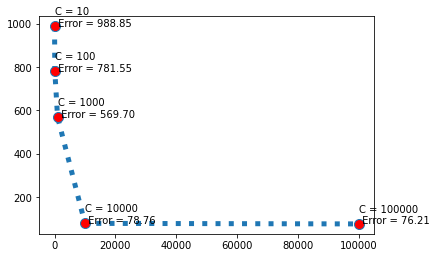

In [95]:
# Visualizing the errors obtained from the random multiplication
plt.plot(C, errors, ls = ':', lw = 5, marker = 'o',
         markersize = 10,
         markerfacecolor = 'red', label = 'Non-uniform sampling')

for i in range(len(C)):
    plt.annotate("C = {} \n Error = {:.2f}".format(C[i],errors[i]), (C[i] + 100, errors[i]))
    

In [ ]:
A @ B

matrix([[ 2200,  2145,  2090,  2035,  1980,  1925,  1870,  1815,  1760,
          1705],
        [ 7700,  7545,  7390,  7235,  7080,  6925,  6770,  6615,  6460,
          6305],
        [13200, 12945, 12690, 12435, 12180, 11925, 11670, 11415, 11160,
         10905],
        [18700, 18345, 17990, 17635, 17280, 16925, 16570, 16215, 15860,
         15505],
        [24200, 23745, 23290, 22835, 22380, 21925, 21470, 21015, 20560,
         20105],
        [29700, 29145, 28590, 28035, 27480, 26925, 26370, 25815, 25260,
         24705],
        [35200, 34545, 33890, 33235, 32580, 31925, 31270, 30615, 29960,
         29305],
        [40700, 39945, 39190, 38435, 37680, 36925, 36170, 35415, 34660,
         33905],
        [46200, 45345, 44490, 43635, 42780, 41925, 41070, 40215, 39360,
         38505],
        [51700, 50745, 49790, 48835, 47880, 46925, 45970, 45015, 44060,
         43105]])

In [72]:
randomized_matrix_mul(A,B,C = 1000)

array([[ 2179.5286754 ,  2125.24584998,  2070.96302455,  2016.68019912,
         1962.3973737 ,  1908.11454827,  1853.83172285,  1799.54889742,
         1745.26607199,  1690.98324657],
       [ 7679.68132624,  7526.04908997,  7372.41685369,  7218.78461742,
         7065.15238114,  6911.52014487,  6757.88790859,  6604.25567232,
         6450.62343604,  6296.99119977],
       [13179.83397709, 12926.85232996, 12673.87068284, 12420.88903571,
        12167.90738859, 11914.92574146, 11661.94409434, 11408.96244721,
        11155.98080009, 10902.99915297],
       [18679.98662793, 18327.65556996, 17975.32451198, 17622.99345401,
        17270.66239603, 16918.33133806, 16566.00028009, 16213.66922211,
        15861.33816414, 15509.00710616],
       [24180.13927877, 23728.45880995, 23276.77834113, 22825.0978723 ,
        22373.41740348, 21921.73693466, 21470.05646583, 21018.37599701,
        20566.69552819, 20115.01505936],
       [29680.29192962, 29129.26204994, 28578.23217027, 28027.2022906 ,
   